In [1]:
import cv2
import numpy as np
import math

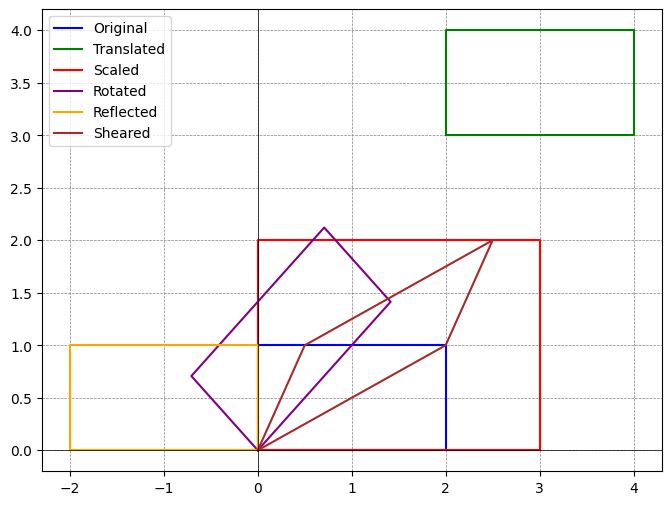

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_object(vertices, color='blue', label=None):
    vertices = np.append(vertices, [vertices[0]], axis=0)  # Close the shape
    plt.plot(vertices[:, 0], vertices[:, 1], color=color, label=label)

def transform_object(vertices, transformation_matrix):
    ones = np.ones((vertices.shape[0], 1))
    homogeneous_vertices = np.hstack([vertices, ones])  # Convert to homogeneous coordinates
    transformed_vertices = homogeneous_vertices @ transformation_matrix.T
    return transformed_vertices[:, :2]

# Original object: rectangle
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1]])

# Transformation Matrices
translation_matrix = np.array([[1, 0, 2], [0, 1, 3], [0, 0, 1]])
scaling_matrix = np.array([[1.5, 0, 0], [0, 2, 0], [0, 0, 1]])
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                            [np.sin(np.pi/4), np.cos(np.pi/4), 0],
                            [0, 0, 1]])
reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
shearing_matrix = np.array([[1, 0.5, 0], [0.5, 1, 0], [0, 0, 1]])

# Apply transformations
translated = transform_object(rectangle, translation_matrix)
scaled = transform_object(rectangle, scaling_matrix)
rotated = transform_object(rectangle, rotation_matrix)
reflected = transform_object(rectangle, reflection_matrix)
sheared = transform_object(rectangle, shearing_matrix)

# Plot
plt.figure(figsize=(8, 6))
plot_object(rectangle, color='blue', label='Original')
plot_object(translated, color='green', label='Translated')
plot_object(scaled, color='red', label='Scaled')
plot_object(rotated, color='purple', label='Rotated')
plot_object(reflected, color='orange', label='Reflected')
plot_object(sheared, color='brown', label='Sheared')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


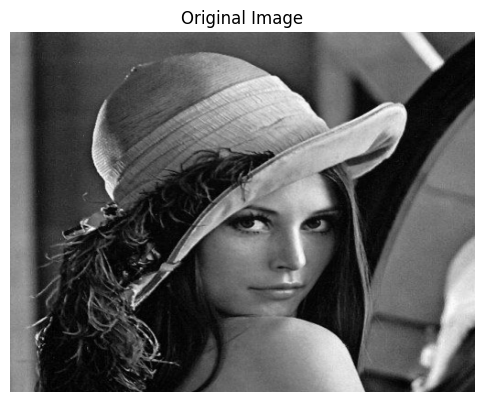

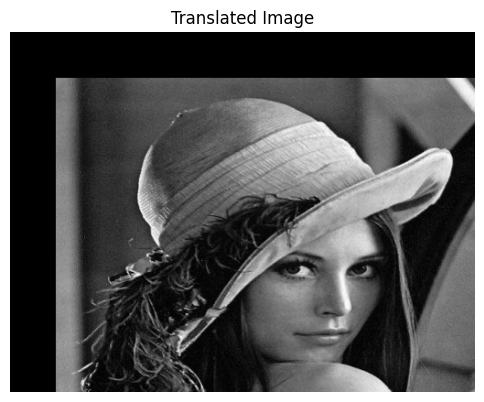

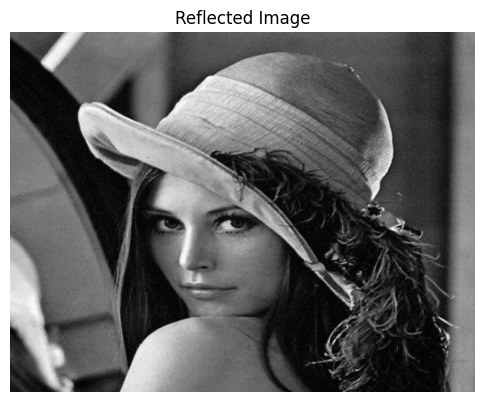

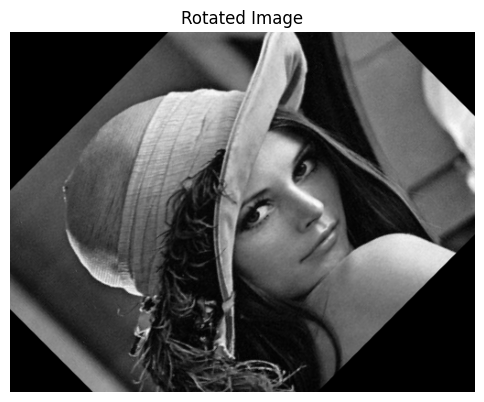

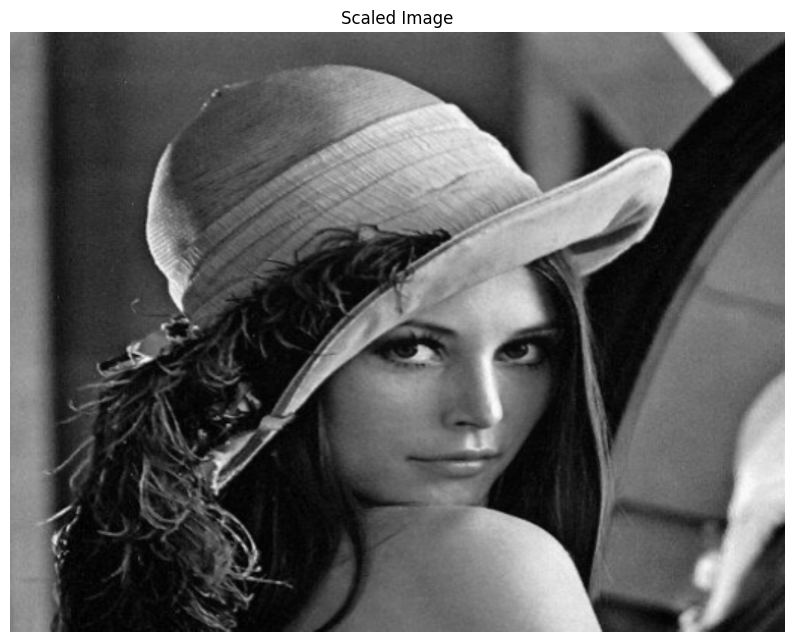

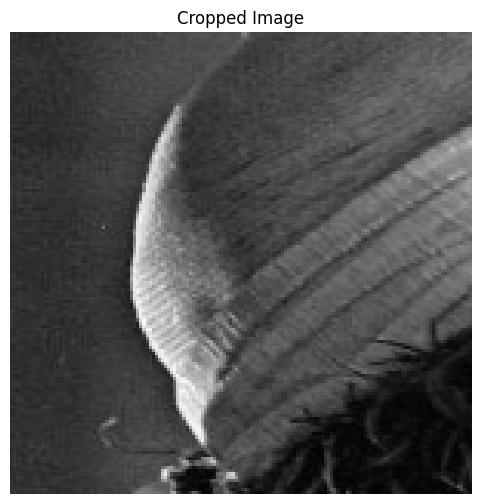

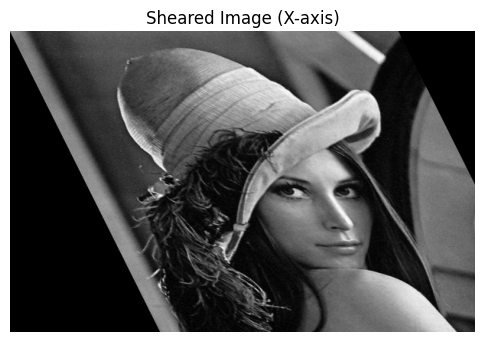

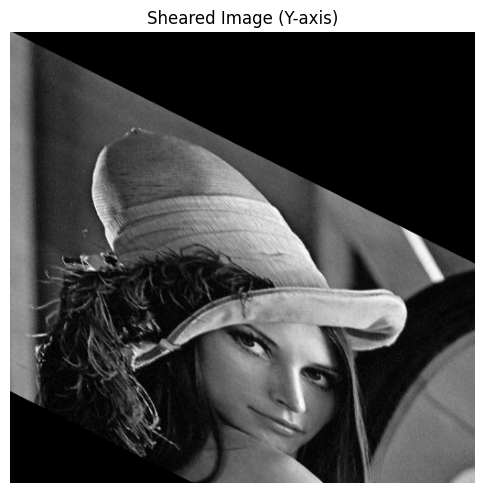

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/actress.png')  # Replace with your image file
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

def show_image(title, img):
    if(title=="Scaled Image"):
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()

# 1. Translation
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])  # Shift by (50, 50)
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# 2. Reflection
reflected_image = cv2.flip(image, 1)  # Flip along the y-axis

# 3. Rotation
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # 45-degree rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# 4. Scaling
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# 5. Cropping
cropped_image = image[50:200, 50:200]  # Crop a region

# 6. Shearing in x-axis
shearing_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shearing_matrix, (cols + 100, rows))

# 7. Shearing in y-axis
shearing_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (cols, rows + 100))

# Display all transformations
show_image("Original Image", image)
show_image("Translated Image", translated_image)
show_image("Reflected Image", reflected_image)
show_image("Rotated Image", rotated_image)
show_image("Scaled Image", scaled_image)
show_image("Cropped Image", cropped_image)
show_image("Sheared Image (X-axis)", sheared_image_x)
show_image("Sheared Image (Y-axis)", sheared_image_y)
